## Práctica 6: Algoritmos de grafos. Parte 1
- **Objetivo:** Conocer las formas de representar un grafo e identificar las características necesarias para entender el algoritmo de búsqueda por expansión.
- **Actividades:** Implementar la búsqueda por expansión en un grafo representado por una lista de adyacencia en lenguaje Python.
- **Instrucciones:**

    • Implementar en lenguaje Python el algoritmo de búsqueda por expansión dentro de un grafo a partir de un nodo fuente s. El grafo puede ser dirigido y no dirigido, puede tener o no costo. 

    • Obtener el polinomio y la complejidad algorítmica del algoritmo búsqueda por expansión para el mejor, el peor y el caso promedio. 
    
    • Crear las gráficas de la complejidad que tiene el algoritmo de búsqueda por expansión dentro de un grafo para el mejor caso, el peor caso y el caso promedio

In [1]:
import matplotlib.pyplot as plt
import random

C R E A C I Ó N _ D E L _ N O D O

In [2]:
class Node:
    to = 0 # Nodo al que se conecta
    cost = 0 # Costo
    nxt = None # Nodo siguiente
    
    #BFS 
    prev = None # Nodo anterior
    # color: 0 - blanco, 1 - gris,  2 - negro
    color = 0
    distance = -1

C R E A C I Ó N _ D E L _ G R A F O

In [3]:
class Graph: 
    def __init__ (self, numNodes, numEdges, directed, cost):
        self.edges = [] # Aristas
        self.grade = [] # Grado del nodo, número de aristas que salen
        self.numNodes = numNodes
        self.numEdges = numEdges
        # Si el grafo es dirigido / con costo será 1, sino 0
        self.directed = True if directed == 1 else False
        self.hasCost = True if cost == 1 else False


        i = 0
        while i <= self.numNodes:
            self.grade.append(0) # El nodo no tiene conexiones
            self.edges.append(Node()) # Sin conexiones definidas
            i += 1
            
# ======================================================================================

    # I N S E R C I Ó N _ A R I S T A
    
    def insert_edge(self, intU, intV, intCost, isDirected):
    # Inserta una arista de U (origen) a V (destino)
        item = Node()
        item.cost = intCost
        item.to = intV # Apunta al nodo de destino
        item.nxt = self.edges[intU] # Encadena la arista, construye una lista enlazada
        
        self.edges[intU] = item # Se convierte en la cabeza de aristas que salen de U
        self.grade[intU] += 1 # Una nueva arista, se incrementa el grado
        
        # Verifica la arista no es dirigida y si no es un lazo 
        if isDirected == False and intV != intU:
            # Se agrega una arista de V a U
            self.insert_edge(intV, intU, intCost, True)
            
# ======================================================================================

    # L E C T U R A _ A R I S T A
    def read_edges(self):
        i = 1
        # Solicita al usuario las aristas
        while i <= self.numEdges:
            u = random.randint(1, self.numNodes)
            v = random.randint(1, self.numNodes)
            
            if self.hasCost == True:
                cost = random.randint(1, 10)
            else: 
                cost = 1 # Costo por defecto
                
            self.insert_edge(u, v, cost, self.directed) # Inserta en el grafo
            i += 1
            
    # ======================================================================================

    # I M P R E S I Ó N
    
    def printUwU(self):
        i = 1
        item = None
        string = "" # Acumula la representación del grafo
        
        while i <= self.numNodes: # Itera sobre los nodos
            string += str(i) + "\t" # Agrega el número del nodo 
            item = self.edges[i] # Se inicializa con la cabeza de la lista enlazada
            
            while item != None: # Itera sobre las aristas
                # Añade el nodo de destino y el costo
                string += str(item.to) + ": " + str(item.cost) + "\t" 
                # Avanza al siguiente nodo
                item = item.nxt
                
            string += "\n"
            i += 1 
            
            print(string)
        
# ======================================================================================

    # B R E A D T H _ F I R S T _ S E A R C H
    
    def breadth_first_search(self, intSource):
        timeA = 0 
        timeV = 0
        timeTotal = 0
        
        if self.edges[intSource] == None:
            print(f"El nodo {intSource} no tiene aristas.")
        
        self.edges[intSource].color = 1 # Nodo fuente gris, empieza la búsqueda en ese nodo
        self.edges[intSource].distance = 0 # Distancia = 0
        self.edges[intSource].prev = None # No tiene predecesor
        queue = [] # cola auxiliar
        queue.append(intSource) # se añade el nodo 
        
        while len(queue) != 0: # Hasta que la cola esté vacia
            timeV += 1
            timeTotal += 1
            u = queue.pop(0) # Saca el primer nodo de la cola
            v = self.edges[u] # primera arista que sale del nodo U
            
            # Recorre las aristas de U, comprueba si el nodo adyacente ya ha sido visitado
            while v != None: 
                #print("Entró arista")
                timeA += 1
                timeTotal += 1
                if self.edges[v.to] != None: # Verifica que el nodo no sea nulo
                    if self.edges[v.to].color == 0: # verifica si no ha sido visitado
                        self.edges[v.to].color = 1 # Lo marca como gris
                        self.edges[v.to].distance = self.edges[u].distance + 1 # Actualiza distancia
                        self.edges[v.to].prev = u  # Guarda el predecesor
                        queue.append(v.to) # Añade el nodo a la cola para explorar a sus vecinos
                v = v.nxt # avanza a la siguiente arista
            self.edges[u].color = 2 # marca como negro si ya fue completamente explorado
        return timeA, timeV, timeTotal
# ======================================================================================

    # I M P R E S I Ó N _ C O L O R 
    
    def print_color(self): 
        i = 1
        print("\nBREADTH FIRST SEARCH: ")
        string = "" # Acumula info
        while i <= self.numNodes: # Recorre los nodos
            if self.edges[i] != None: # Verifica si existe
                # Asignación de colores
                if self.edges[i].color == 0:
                    color = "blanco"
                elif self.edges[i].color == 1:
                    color = "gris"
                else:
                    color = "Negro"
                    
                cont = 0
                tabs = ""
                
                # Añade una tabulación por cada unidad de distancia
                while cont < self.edges[i].distance: 
                    tabs += "\t"
                    cont += 1
                
                # cadena de salida
                string += tabs + str(i) + ": " + color + "-" + str(self.edges[i].distance) + "\t"
                string += "\n"
            
            i += 1
        print(string)
        

E J E C U C I Ó N

In [4]:
def main():
    # Solicita la información 
    nodes = int(input("Vertex number?")) # Núm nodos
    edges = int(input("Edges number?")) # Núm vertices
    isDirected = int(input("It is directed? 1) YES, 2) NO: ")) # Dirección
    hasCost = int(input("Edge's cost? 1) YES, 2) NO: ")) # Costo
    source = int(input("Source vertex?")) # Nodo de origen
    
    objGraph = Graph(nodes, edges, isDirected, hasCost)
    objGraph.read_edges()
    objGraph.printUwU()
    objGraph.breadth_first_search(source)
    objGraph.print_color()

main()

1	0: 0	

1	0: 0	
2	7: 4	8: 3	7: 3	0: 0	

1	0: 0	
2	7: 4	8: 3	7: 3	0: 0	
3	0: 0	

1	0: 0	
2	7: 4	8: 3	7: 3	0: 0	
3	0: 0	
4	9: 10	3: 5	0: 0	

1	0: 0	
2	7: 4	8: 3	7: 3	0: 0	
3	0: 0	
4	9: 10	3: 5	0: 0	
5	6: 6	0: 0	

1	0: 0	
2	7: 4	8: 3	7: 3	0: 0	
3	0: 0	
4	9: 10	3: 5	0: 0	
5	6: 6	0: 0	
6	5: 1	0: 0	

1	0: 0	
2	7: 4	8: 3	7: 3	0: 0	
3	0: 0	
4	9: 10	3: 5	0: 0	
5	6: 6	0: 0	
6	5: 1	0: 0	
7	0: 0	

1	0: 0	
2	7: 4	8: 3	7: 3	0: 0	
3	0: 0	
4	9: 10	3: 5	0: 0	
5	6: 6	0: 0	
6	5: 1	0: 0	
7	0: 0	
8	7: 4	0: 0	

1	0: 0	
2	7: 4	8: 3	7: 3	0: 0	
3	0: 0	
4	9: 10	3: 5	0: 0	
5	6: 6	0: 0	
6	5: 1	0: 0	
7	0: 0	
8	7: 4	0: 0	
9	9: 3	0: 0	

1	0: 0	
2	7: 4	8: 3	7: 3	0: 0	
3	0: 0	
4	9: 10	3: 5	0: 0	
5	6: 6	0: 0	
6	5: 1	0: 0	
7	0: 0	
8	7: 4	0: 0	
9	9: 3	0: 0	
10	5: 3	0: 0	


BREADTH FIRST SEARCH: 
1: blanco--1	
2: blanco--1	
3: blanco--1	
4: blanco--1	
	5: Negro-1	
		6: Negro-2	
7: blanco--1	
8: blanco--1	
9: blanco--1	
10: Negro-0	



**Análisis Peor Caso:** Todas las conexiones entre cada nodo

    def breadth_first_search(self, intSource):
            self.edges[intSource].color = 1                                                 # 6
            self.edges[intSource].distance = 0                                              # 6 
            self.edges[intSource].prev = None                                               # 6 
            queue = []                                                                      # 3
            queue.append(intSource)                                                         # 3
            
            while len(queue) != 0:                                                          # 4 * (V + 1)
                u = queue.pop(0)                                                            # 5 * V
                v = self.edges[u]                                                           # 5 * V
                
                while v != None:                                                            # 4 * (V + A)
                    if self.edges[v.to] != None:                                            # 6 * (V + A)
                        if self.edges[v.to].color == 0:                                     # 7 * (V + A)
                            self.edges[v.to].color = 1                                      # 7 * (V + A)
                            self.edges[v.to].distance = self.edges[u].distance + 1          # 12 * (V + A)
                            self.edges[v.to].prev = u                                       # 7 * (V + A)
                            queue.append(v.to)                                              # 4 * (V + A)
                    v = v.nxt                                                               # 4 * (V + A)
                self.edges[u].color = 2                                                     # 6
                                                                                            # O (V + A) = 65V + 51A + 34

**Análisis Mejor Caso:** Nodo aislado

    def breadth_first_search(self, intSource):
            self.edges[intSource].color = 1                                                 # 6
            self.edges[intSource].distance = 0                                              # 6 
            self.edges[intSource].prev = None                                               # 6 
            queue = []                                                                      # 3
            queue.append(intSource)                                                         # 3
            
            while len(queue) != 0:                                                          # 4 * (V + 1)
                u = queue.pop(0)                                                            # 5 * V
                v = self.edges[u]                                                           # 5 * V
                
                while v != None:                                                            # 4 * V * 1
                    if self.edges[v.to] != None:                                            # 6 * V 
                        if self.edges[v.to].color == 0:                                     # 7 * V
                            self.edges[v.to].color = 1                                      # 7 * V 
                            self.edges[v.to].distance = self.edges[u].distance + 1          # 12 * V
                            self.edges[v.to].prev = u                                       # 7 * V
                            queue.append(v.to)                                              # 4 * V
                    v = v.nxt                                                               # 4 * V
                self.edges[u].color = 2                                                     # 6
                                                                                            # O (V) = 65V + 38
                                                                                            # O(1) = 65*1 + 38 = cte

**Análisis Caso Promedio:** Número random de conexiones

    def breadth_first_search(self, intSource):
                self.edges[intSource].color = 1                                                 # 6
                self.edges[intSource].distance = 0                                              # 6 
                self.edges[intSource].prev = None                                               # 6 
                queue = []                                                                      # 3
                queue.append(intSource)                                                         # 3
                
                while len(queue) != 0:                                                          # 4 * (V + 1)
                    u = queue.pop(0)                                                            # 5 * V
                    v = self.edges[u]                                                           # 5 * V
                    
                    while v != None:                                                            # 4 * (V + A)
                        if self.edges[v.to] != None:                                            # 6 * (V + A)
                            if self.edges[v.to].color == 0:                                     # 7 * (V + A)
                                self.edges[v.to].color = 1                                      # 7 * (V + A)
                                self.edges[v.to].distance = self.edges[u].distance + 1          # 12 * (V + A)
                                self.edges[v.to].prev = u                                       # 7 * (V + A)
                                queue.append(v.to)                                              # 4 * (V + A)
                        v = v.nxt                                                               # 4 * (V + A)
                    self.edges[u].color = 2                                                     # 6
                                                                                            # O (V + A) = 65V + 51A + 34

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


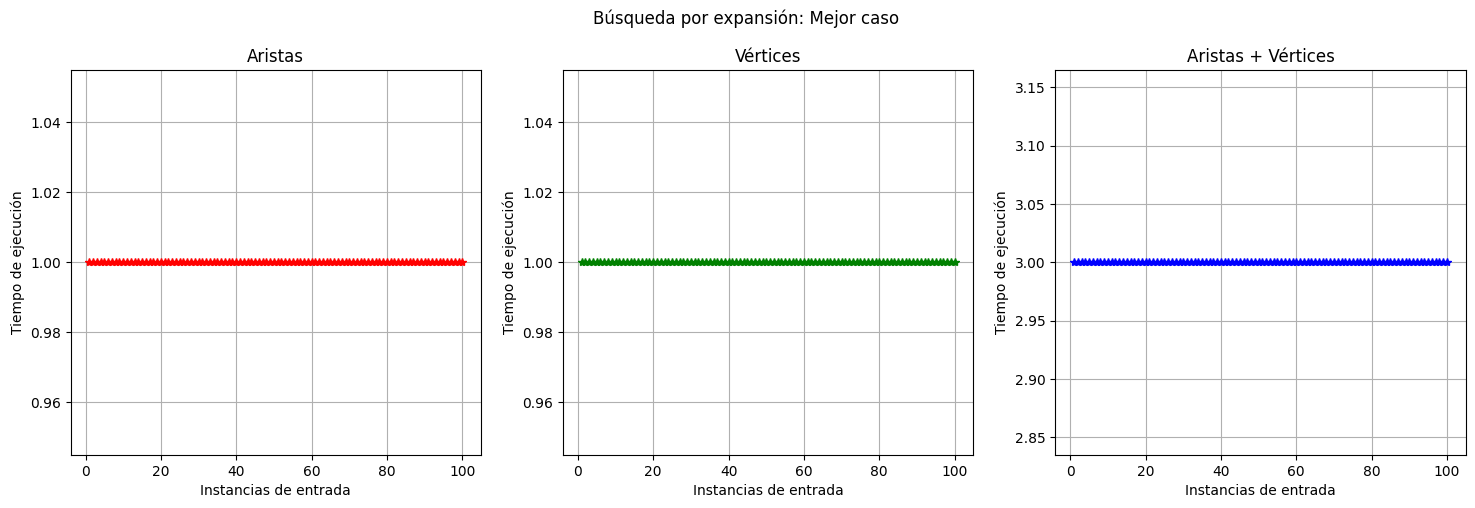

In [5]:
def mejorCaso():
    TAM = 100
    
    # ================================================
    # M E J O R  C A S O
    
    MejorTimeA = []
    MejorTimeV = []
    MejortimeTotal = []
    timeA = 0
    timeV = 0
    timeTotal = 0
    x = [i for i in range(1, TAM + 1)]
    i = 0
    
    while i < len(x):
        num = x[i]
        node = num
        edges = 0
        isDirected = 0
        hasCost = 1
        source = 1

        mejorCaso = Graph(node, edges, isDirected, hasCost)
        mejorCaso.read_edges()
        timeA, timeV, timeTotal = mejorCaso.breadth_first_search(source)

        MejorTimeA.append(timeA-1)
        MejorTimeV.append(timeV-1)
        MejortimeTotal.append(timeTotal-1)

        
        i += 1 
        
    print(MejorTimeA)
    print(MejorTimeV)
    print(x)

    fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(18,5))

    ax1 = axs[0]
    ax2 = axs[1]
    ax3 = axs[2]

    ax1.plot(x, MejorTimeA, "r*")
    ax2.plot(x, MejorTimeV, "g*")
    ax3.plot(x, MejortimeTotal, "b*")

    fig.suptitle("Búsqueda por expansión: Mejor caso", y = 1)
    ax1.set_title("Aristas")
    ax2.set_title("Vértices")
    ax3.set_title("Aristas + Vértices")

    ax1.set_xlabel("Instancias de entrada")
    ax1.set_ylabel("Tiempo de ejecución")

    ax2.set_xlabel("Instancias de entrada")
    ax2.set_ylabel("Tiempo de ejecución")

    ax3.set_xlabel("Instancias de entrada")
    ax3.set_ylabel("Tiempo de ejecución")

    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)

mejorCaso()


    
    

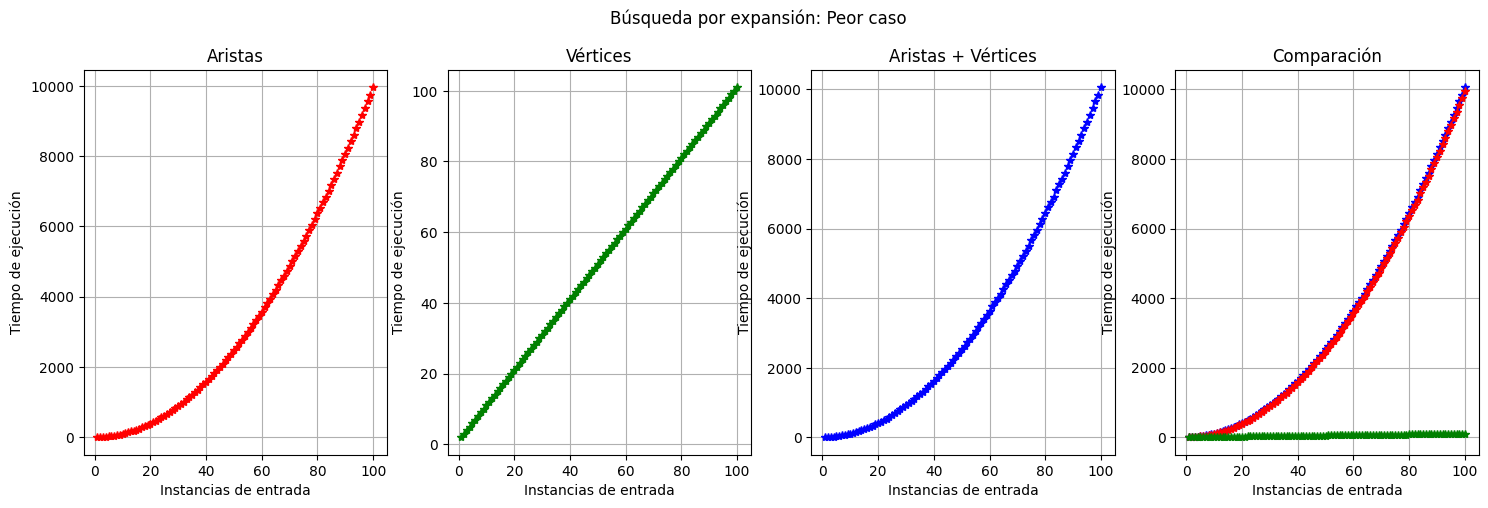

In [6]:
def peorCaso():
    TAM = 100
    
    # ================================================
    # P E O R  C A S O
    
    PeorTimeA = []
    PeorTimeV = []
    PeortimeTotal = [] 
    PeorTotal = []
    timeA = 0
    timeV = 0
    timeTotal = 0
    x = [i for i in range(1, TAM + 1)]
    i = 0
    
    while i < len(x):
        num = x[i]
        node = num
        isDirected = 0
        hasCost = 1
        edges = (node * (node - 1)) // 2 
        source = 1

        peorCaso = Graph(node, edges, isDirected, hasCost)
        peorCaso.read_edges()
        timeA, timeV, timeTotal = peorCaso.breadth_first_search(source)
        PeorTimeA.append(timeA)
        PeorTimeV.append(timeV)
        PeortimeTotal.append(timeTotal) 
        PeorTotal.append(timeA + timeV)
        
        i += 1 
    
    fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(18,5))

    ax1 = axs[0]
    ax2 = axs[1]
    ax3 = axs[2]
    ax4 = axs[3]
    """
    plt.plot(x, PeorTimeA, "r*")
    plt.plot(x, PeorTimeV, "b*")
    plt.plot(x, PeorTotal, "g*")
    plt.show()
    """
    ax1.plot(x, PeorTimeA, "r*")
    ax2.plot(x, PeorTimeV, "g*")
    ax3.plot(x, PeortimeTotal, "b*") 
    ax4.plot(x, PeorTotal, "b*")
    ax4.plot(x, PeorTimeA, "r*")
    ax4.plot(x, PeorTimeV, "g*")
    
    fig.suptitle("Búsqueda por expansión: Peor caso", y = 1)
    ax1.set_title("Aristas")
    ax2.set_title("Vértices")
    ax3.set_title("Aristas + Vértices")
    ax4.set_title("Comparación")

    ax1.set_xlabel("Instancias de entrada")
    ax1.set_ylabel("Tiempo de ejecución")

    ax2.set_xlabel("Instancias de entrada")
    ax2.set_ylabel("Tiempo de ejecución")

    ax3.set_xlabel("Instancias de entrada")
    ax3.set_ylabel("Tiempo de ejecución")

    ax4.set_xlabel("Instancias de entrada")
    ax4.set_ylabel("Tiempo de ejecución")

    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)
    ax4.grid(True)
    
peorCaso()


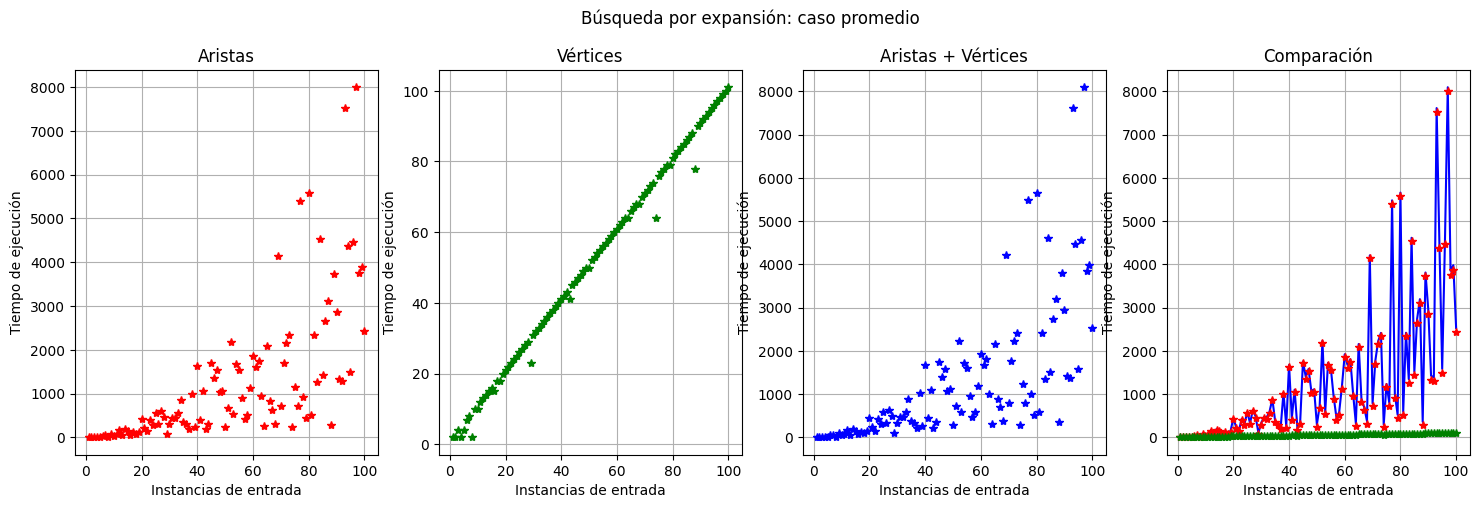

In [7]:
def casoPromedio():
    TAM = 100
    
    PromedioTimeA = []
    PromedioTimeV = []
    PromediotimeTotal = []
    PromedioTotal = []
    
    timeA = 0
    timeV = 0
    timeTotal = 0
    
    x = [i for i in range(1, TAM+1)]
    i = 0
    
    while i < len(x):
        num = x[i]
        node = num
        edges = node - 1
        isDirected = random.randint(1, 2)
        hasCost = 1
        
        if node > 1:
            edges += random.randint(1, (node * (node - 1)) // 2)
        else:
            edges = 0
            
        source = random.randint(1, node)

        casoPromedio = Graph(node, edges, isDirected, hasCost)
        casoPromedio.read_edges()
        timeA, timeV, timeTotal = casoPromedio.breadth_first_search(source)

        PromedioTimeA.append(timeA)
        PromedioTimeV.append(timeV)
        PromediotimeTotal.append(timeTotal)
        PromedioTotal.append(timeA + timeV)

        i += 1 
    


    fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(18,5))

    ax1 = axs[0]
    ax2 = axs[1]
    ax3 = axs[2]
    ax4 = axs[3]

    ax1.plot(x, PromedioTimeA, "r*")
    ax2.plot(x, PromedioTimeV, "g*")
    ax3.plot(x, PromediotimeTotal, "b*") 
    ax4.plot(x, PromedioTotal, "b")
    ax4.plot(x, PromedioTimeA, "r*")
    ax4.plot(x, PromedioTimeV, "g*")
    

    fig.suptitle("Búsqueda por expansión: caso promedio", y = 1)
    ax1.set_title("Aristas")
    ax2.set_title("Vértices")
    ax3.set_title("Aristas + Vértices")
    ax4.set_title("Comparación")

    ax1.set_xlabel("Instancias de entrada")
    ax1.set_ylabel("Tiempo de ejecución")

    ax2.set_xlabel("Instancias de entrada")
    ax2.set_ylabel("Tiempo de ejecución")

    ax3.set_xlabel("Instancias de entrada")
    ax3.set_ylabel("Tiempo de ejecución")

    ax4.set_xlabel("Instancias de entrada")
    ax4.set_ylabel("Tiempo de ejecución")
    
    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)
    ax4.grid(True)

casoPromedio()